In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [ ]:
# General Params
MAIN_SEED = 42  # Random Seed

# For first aproach
USE_LESS_DATA = True  # If not enough mem available
LR = 0.01  # Learning Rate
BATCH_SIZE = 32  # Batch Size
EPOCH = 50
IMAGE_RESIZE_X = 200  # Image Width
IMAGE_RESIZE_Y = 200  # Image height
KEEP_COLOR = False  # Keep color in images. Color takes 3x Mem space

In [ ]:
total_all_count = 0
total_hem_count = 0
for dirname, _, filenames in os.walk('../Leukemia -  Data/training_data'):
    for filename in filenames:
        all_count = 0
        hem_count = 0
        if "training" in dirname:
            if "all" in dirname:
                all_count = len(filenames)
            elif "hem" in dirname:
                hem_count = len(filenames)
            total_all_count += all_count
            total_hem_count += hem_count
            break
print(f"HEM(Normal) Cell Count {total_hem_count} \nALL(Leukemia) Cell Count {total_all_count}")

HEM(Normal) Cell Count 3389 
ALL(Leukemia) Cell Count 7272


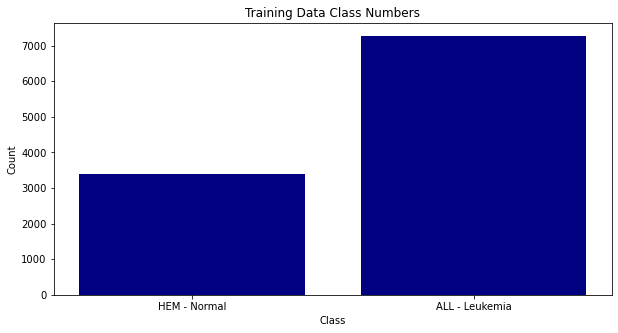

In [ ]:
# Data
data = {'HEM - Normal':total_hem_count, 'ALL - Leukemia':total_all_count}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='navy')

plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Training Data Class Numbers")
plt.show()

Text(0.5, 1.0, 'HEM - Normal')

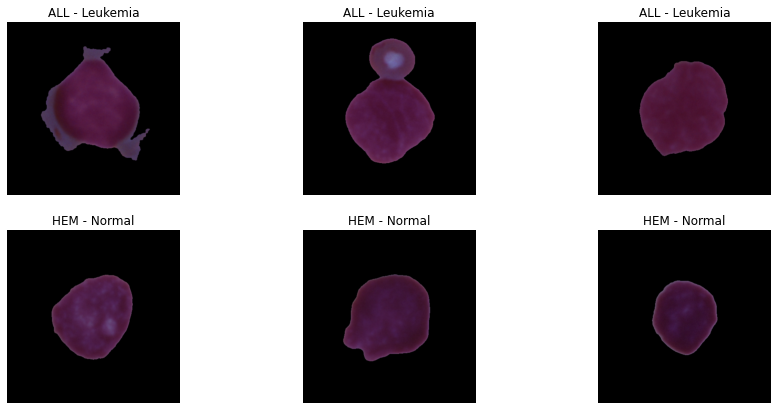

In [ ]:
import cv2 as cv

im1_path = "../Leukemia -  Data/training_data/fold_1/all/UID_16_29_1_all.bmp"
im2_path = "../Leukemia -  Data/training_data/fold_1/all/UID_16_13_1_all.bmp"
im3_path = "../Leukemia -  Data/training_data/fold_1/all/UID_16_11_1_all.bmp"
im4_path = "../Leukemia -  Data/training_data/fold_1/hem/UID_H10_102_4_hem.bmp"
im5_path = "../Leukemia -  Data/training_data/fold_1/hem/UID_H10_105_2_hem.bmp"
im6_path = "../Leukemia -  Data/training_data/fold_1/hem/UID_H10_107_2_hem.bmp"


im1 = cv.imread(im1_path)
im2 = cv.imread(im2_path)
im3 = cv.imread(im3_path)
im4 = cv.imread(im4_path)
im5 = cv.imread(im5_path)
im6 = cv.imread(im6_path)

# Set figure
rows = 2
columns = 3
fig = plt.figure(figsize=(15, 7))

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# im1
plt.imshow(im1)
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# im2
plt.imshow(im2)
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# im3
plt.imshow(im3)
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# im4
plt.imshow(im4)
plt.axis('off')
plt.title('HEM - Normal')

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)

#im4
plt.imshow(im5)
plt.axis('off')
plt.title('HEM - Normal')

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)

#im6
plt.imshow(im6)
plt.axis('off')
plt.title('HEM - Normal')

In [ ]:
training_all_0 = "../Leukemia -  Data/training_data/fold_0/all/"
training_hem_0 = "../Leukemia -  Data/training_data/fold_0/hem/"
training_all_1 = "../Leukemia -  Data/training_data/fold_1/all/"
training_hem_1 = "../Leukemia -  Data/training_data/fold_1/hem/"
training_all_2 = "../Leukemia -  Data/training_data/fold_2/all/"
training_hem_2 = "../Leukemia -  Data/training_data/fold_2/hem/"
validation_data = "../Leukemia -  Data/validation_data/C-NMC_test_prelim_phase_data/"

In [ ]:
image_paths = []
image_labels = []

for data_folder_path in [training_all_0,training_all_1,training_all_2,training_hem_0,training_hem_1,training_hem_2]:
    all_images_in_folder = os.listdir(data_folder_path)
    for image_path in all_images_in_folder:
        image_label = 1 if 'all' in data_folder_path else 0

        image_paths.append(data_folder_path + image_path)
        image_labels.append(image_label)

dict_train = {"image_paths":image_paths, "image_labels":image_labels}
df_train = pd.DataFrame(dict_train)

df_train

,image_paths,image_labels
0,../Leukemia - Data/training_data/fold_0/all/U...,1
1,../Leukemia - Data/training_data/fold_0/all/U...,1
2,../Leukemia - Data/training_data/fold_0/all/U...,1
3,../Leukemia - Data/training_data/fold_0/all/U...,1
4,../Leukemia - Data/training_data/fold_0/all/U...,1
...,...,...
10656,../Leukemia - Data/training_data/fold_2/hem/U...,0
10657,../Leukemia - Data/training_data/fold_2/hem/U...,0
10658,../Leukemia - Data/training_data/fold_2/hem/U...,0
10659,../Leukemia - Data/training_data/fold_2/hem/U...,0


In [ ]:
df_train['image_labels'].value_counts()

1    7272
0    3389
Name: image_labels, dtype: int64

In [ ]:
df_val = pd.read_csv('../Leukemia -  Data/validation_data/C-NMC_test_prelim_phase_data_labels.csv')

# Drop Patient_ID column and rename columns
df_val['image_paths'] = df_val['new_names']
df_val['image_labels'] = df_val['labels']
df_val = df_val[['image_paths', 'image_labels']]

# Change image path from relative to full
df_val['image_paths'] = df_val['image_paths'].apply(lambda x: '../Leukemia -  Data/validation_data/C-NMC_test_prelim_phase_data/'+x)

In [ ]:
df_val['image_labels'].value_counts()

1    1219
0     648
Name: image_labels, dtype: int64

In [ ]:
df_train = df_train.sample(frac=1, random_state=MAIN_SEED)
df_val = df_val.sample(frac=1, random_state=MAIN_SEED)

In [ ]:
def read_and_crop_image(image_path):
    # Read image
    image = cv.imread(image_path)
    # Convert Color System from BGR(Blue, Green, Red) to GRAY
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    # Aplly Otsu's Thresholding
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

    # Apply threshold
    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh==0] = [255,255,255]
    (x, y, z_) = np.where(result > 0)
    mnx = (np.min(x))
    mxx = (np.max(x))
    mny = (np.min(y))
    mxy = (np.max(y))

    # Crop Image
    crop_img = image[mnx:mxx,mny:mxy,:]
    #resized_image = cv.resize(crop_img, (IMAGE_RESIZE_X, IMAGE_RESIZE_Y))

    # We can see resizing params as hyperparameters
    # This will determine sample feature count
    # Note: We keep Heigh/Width Ratio by Filling Black
    # Because just resizing will change cell shape structure
    border_v = 0
    border_h = 0
    if (IMAGE_RESIZE_Y/IMAGE_RESIZE_X) >= (crop_img.shape[0]/crop_img.shape[1]):
        border_v = int((((IMAGE_RESIZE_Y/IMAGE_RESIZE_X)*crop_img.shape[1])-crop_img.shape[0])/2)
    else:
        border_h = int((((IMAGE_RESIZE_Y/IMAGE_RESIZE_X)*crop_img.shape[0])-crop_img.shape[1])/2)

    crop_img = cv.copyMakeBorder(crop_img, border_v, border_v, border_h, border_h, cv.BORDER_CONSTANT, 0)
    resized_image = cv.resize(crop_img, (IMAGE_RESIZE_X, IMAGE_RESIZE_Y))

    # Return colorful image if KEEP_COLOR set
    if KEEP_COLOR:
        return resized_image
    else:
        return cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY)

    return resized_image

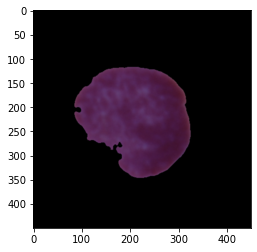

In [ ]:
sample_path = df_train[:1]['image_paths'].values[0]

image = cv.imread(sample_path)
plt.imshow(image)
plt.show()

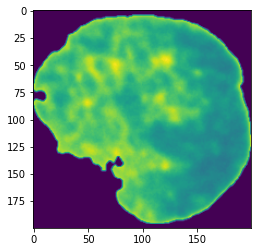

In [ ]:

image = df_train[:1]['image_paths'].apply(read_and_crop_image).values[0]

plt.imshow(image)
plt.show()

In [ ]:
if USE_LESS_DATA:
    df_train = df_train[:5000]
    df_val = df_val[:1000]

In [ ]:
X_train = df_train['image_paths'].apply(read_and_crop_image).values
X_val = df_val['image_paths'].apply(read_and_crop_image).values

y_train = df_train['image_labels'].values
y_val = df_val['image_labels'].values

# https://stackoverflow.com/a/69873624
X_train = np.stack(X_train, axis=0)
X_val = np.stack(X_val, axis=0)

# Expand dim to add channel info if image has 1 channel(Colorless)
if not KEEP_COLOR:
    X_train = np.expand_dims(X_train, axis=-1)
    X_val = np.expand_dims(X_val, axis=-1)

# Delete non used variables
#del(df_train)
#del(df_val)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=MAIN_SEED)

In [ ]:
print("X_train ->",X_train.shape,
      "\ny_train ->",y_train.shape,
      "\n\nX_test ->",X_test.shape,
      "\ny_test ->",y_test.shape,
      "\n\nX_val ->",X_val.shape,
      "\ny_val ->",y_val.shape
)

X_train -> (4500, 200, 200, 1) 
y_train -> (4500,) 

X_test -> (500, 200, 200, 1) 
y_test -> (500,) 

X_val -> (1000, 200, 200, 1) 
y_val -> (1000,)


In [ ]:
# Reshape the input data to two dimensions
X_train_2d = np.reshape(X_train, (X_train.shape[0], -1))
X_test_2d = np.reshape(X_test, (X_test.shape[0], -1))

# Create and fit the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_2d, y_train)

# Make predictions on the test data
predicted = nb_model.predict(X_test_2d)

# Calculate the accuracy score
score = nb_model.score(X_test_2d, y_test)
nb_score_ = np.mean(score)

# Print the accuracy score
print('Accuracy: %.3f' % nb_score_)


Accuracy: 0.560


In [ ]:
p=precision_score(y_test, predicted)
print('precision : %.3f' % (p))

r=recall_score(y_test, predicted)
print('recall : %.3f' % (r))

f1=f1_score(y_test, predicted)
print('f1-score: %.3f' % (f1))

f1_w=f1_score(y_test, predicted, average='weighted')
print('weighted f1-score: %.3f' % (f1_w))

precision : 0.782
recall : 0.473
f1-score: 0.590
weighted f1-score: 0.568


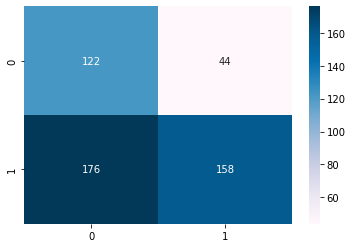

In [ ]:
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, cmap="PuBu", annot=True, fmt='.0f')
plt.show()